Data Set

In [ ]:
##Uploading Data Set

from google.colab import files
files.upload()

Saving NHL Concussions Database_data.csv to NHL Concussions Database_data (1).csv


{'NHL Concussions Database_data (1).csv': b' Season,Team,Position,Player,Injury Type,Cap Hit,Chip,Games Missed,Games Missed\n2012/13,Boston,F,"Bergeron, Patrice",Concussion,5,365.853658537,6,6\n2012/13,Boston,F,"Marchand, Brad",Concussion,2.5,60.975609756,2,2\n2012/13,Boston,F,"Thornton, Shawn",Concussion,1.1,26.829268293,2,2\n2012/13,Carolina,F,"LaRose, Chad",Concussion,1.7,207.317073171,10,10\n2012/13,Carolina,F,"Semin, Alexander",Concussion,7,170.731707317,2,2\n2012/13,Carolina,F,"Skinner, Jeff",Concussion,1.4,85.365853659,5,5\n2012/13,Chicago,D,"Montador, Steve",Concussion,2.75,871.951219512,26,26\n2012/13,Columbus,D,"Wisniewski, James",Concussion,5.5,134.146341463,2,2\n2012/13,Detroit,F,"Eaves, Patrick",Concussion,1.2,14.634146341,1,1\n2012/13,Edmonton,F,"Eager, Ben",Concussion,1.1,120.731707317,9,9\n2012/13,Florida,F,"Selleck, Eric",Concussion,0.55,107.317073171,16,16\n2012/13,Florida,D,"Weaver, Mike",Concussion,1.1,13.414634146,1,1\n2012/13,Montreal,F,"Bourque, Ren\xc3\xa9",Conc

In [ ]:
## Reading Data Set
import pandas as pd

df = pd.read_csv('NHL Concussions Database_data.csv')
df

,Season,Team,Position,Player,Injury Type,Cap Hit,Chip,Games Missed,Games Missed.1
0,2012/13,Boston,F,"Bergeron, Patrice",Concussion,5.00,365.853659,6,6
1,2012/13,Boston,F,"Marchand, Brad",Concussion,2.50,60.975610,2,2
2,2012/13,Boston,F,"Thornton, Shawn",Concussion,1.10,26.829268,2,2
3,2012/13,Carolina,F,"LaRose, Chad",Concussion,1.70,207.317073,10,10
4,2012/13,Carolina,F,"Semin, Alexander",Concussion,7.00,170.731707,2,2
...,...,...,...,...,...,...,...,...,...
399,2022/23,San Jose,D,"Šimek, Radim",Concussion,2.25,82.317073,3,3
400,2022/23,San Jose,G,"Kähkönen, Kaapo",Concussion,2.75,33.536585,1,1
401,2022/23,Vancouver,F,"Lockwood, William",Concussion,0.75,82.317073,9,9
402,2022/23,Vancouver,D,"Dermott, Travis",Concussion,1.50,621.951220,34,34


Central question:


1.   What factors affect severity of concussions in the NHL and how do these factors affect each other?

In [ ]:
##Data Cleaning

import re

df.drop("Games Missed.1", inplace=True, axis=1)
df.drop("Injury Type", inplace=True, axis=1)

def check_unique_char(sent_text):

    convert = re.sub(' \(playoffs\)','', sent_text)
    convert = re.sub(' \(playoffs\+\)','', convert)
    return convert

df['Season'] = df[' Season'].apply(
                                   lambda x : check_unique_char(x))

df['Season'] = df['Season'].str[0:-3]
df['Season'] = df['Season'].astype('float64')

df.drop(" Season", inplace=True, axis=1)
df.columns

df = df.replace('Phoenix', 'Arizona')
df

,Team,Position,Player,Cap Hit,Chip,Games Missed,Season
0,Boston,F,"Bergeron, Patrice",5.00,365.853659,6,2012.0
1,Boston,F,"Marchand, Brad",2.50,60.975610,2,2012.0
2,Boston,F,"Thornton, Shawn",1.10,26.829268,2,2012.0
3,Carolina,F,"LaRose, Chad",1.70,207.317073,10,2012.0
4,Carolina,F,"Semin, Alexander",7.00,170.731707,2,2012.0
...,...,...,...,...,...,...,...
399,San Jose,D,"Šimek, Radim",2.25,82.317073,3,2022.0
400,San Jose,G,"Kähkönen, Kaapo",2.75,33.536585,1,2022.0
401,Vancouver,F,"Lockwood, William",0.75,82.317073,9,2022.0
402,Vancouver,D,"Dermott, Travis",1.50,621.951220,34,2022.0


Exploratory Statistics

In [ ]:
##Chi-square
import scipy.stats
import numpy as np

hyp_1 = pd.crosstab(df['Team'], df['Games Missed'])
hyp_1
_,p,_,_ = scipy.stats.chi2_contingency(hyp_1)
print(p)

##We see that this is close to being significant,
  ##however, it still isn't at the .05 level, so
  ##their may be some relation between the two
  ##but not a significant one
hyp_2 = pd.crosstab(df['Season'], df['Games Missed'])
hyp_2
_,p,_,_ = scipy.stats.chi2_contingency(hyp_2)
print(p)

##Did this test just to verify what we already knew,
  ##that Chip is directly related to Cap Hit
hyp_3 = pd.crosstab(df['Cap Hit'], df['Chip'])
hyp_3
_,p,_,_ = scipy.stats.chi2_contingency(hyp_3)
print(p)

hyp_4 = pd.crosstab(df['Position'], df['Games Missed'])
hyp_4
_,p,_,_ = scipy.stats.chi2_contingency(hyp_4)
print(p)

0.63093820573039
0.10367678539483569
3.169287339464027e-138
0.6495670784650127


Machine learning (decision trees)

In [ ]:
##Creation of Data Frames for ML

df_2 = pd.read_csv('NHL Concussions Database_data.csv')

df_data = df.copy()
df_data.drop("Team", inplace=True, axis=1)
#df_data.drop['Games Missed']    ##originally, we had Games Missed as our target,
                                ##then we realized we needed a categorical feature as our target
df_data.drop("Position", inplace=True, axis=1)
df_data.drop("Player", inplace=True, axis=1)


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

##First Model
features_train, features_test, target_train, target_test = \
  train_test_split(df_data, df_2['Player'], test_size=0.1)

forest_pla = RandomForestClassifier(n_estimators=400)
forest_pla.fit(features_train, target_train)

forest_pla.score(features_test, target_test)

print(df_data.columns)
print(forest_pla.feature_importances_)
print(forest_pla.feature_importances_.max())

##Second Model
features_train, features_test, target_train, target_test = \
  train_test_split(df_data, df_2['Position'], test_size=0.1)

forest_pos = RandomForestClassifier(n_estimators=400)
forest_pos.fit(features_train, target_train)

forest_pos.score(features_test, target_test)

print(df_data.columns)
print(forest_pos.feature_importances_)
print(forest_pos.feature_importances_.max())

##Third Model
features_train, features_test, target_train, target_test = \
  train_test_split(df_data, df_2['Team'], test_size=0.1)

forest_tea = RandomForestClassifier(n_estimators=400)
forest_tea.fit(features_train, target_train)

forest_tea.score(features_test, target_test)

print(df_data.columns)
print(forest_tea.feature_importances_)
print(forest_tea.feature_importances_.max())

Index(['Cap Hit', 'Chip', 'Games Missed', 'Season'], dtype='object')
[0.33149524 0.29507199 0.19308525 0.18034753]
0.33149523765973943
Index(['Cap Hit', 'Chip', 'Games Missed', 'Season'], dtype='object')
[0.32945441 0.31211201 0.18008286 0.17835072]
0.32945441385953217
Index(['Cap Hit', 'Chip', 'Games Missed', 'Season'], dtype='object')
[0.31860906 0.29975389 0.19594199 0.18569507]
0.31860905703669373


1. The first model, with Player as the target, shows the Cap Hit feauture as the most important.

2. The second model, with Position as the target, shows the Cap Hit feauture as the most important.

3. The third model, with Team as the target, shows the Cap Hit feauture as the most important.



Visualization (3 graphs)
1. To show correlations of features, we mad a **Heatmap**.
2. To see the distribution of Games Missed, and thus of severity of the concussion, we created a **Histogram**.
3. Further, we used the **Small Multiple Time Series** from Seaborn to show Games Missed by Season for each Team.


<ipython-input-55-372c51a648a8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-55-372c51a648a8>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


               Cap Hit      Chip  Games Missed    Season
Cap Hit       1.000000  0.379028      0.014010  0.148206
Chip          0.379028  1.000000      0.799415  0.067860
Games Missed  0.014010  0.799415      1.000000 -0.017808
Season        0.148206  0.067860     -0.017808  1.000000


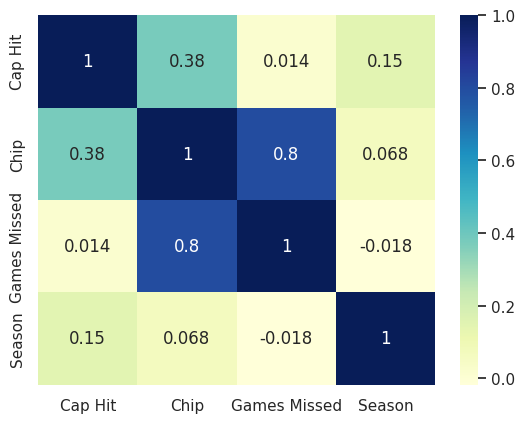

In [ ]:
#1
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

print(df.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

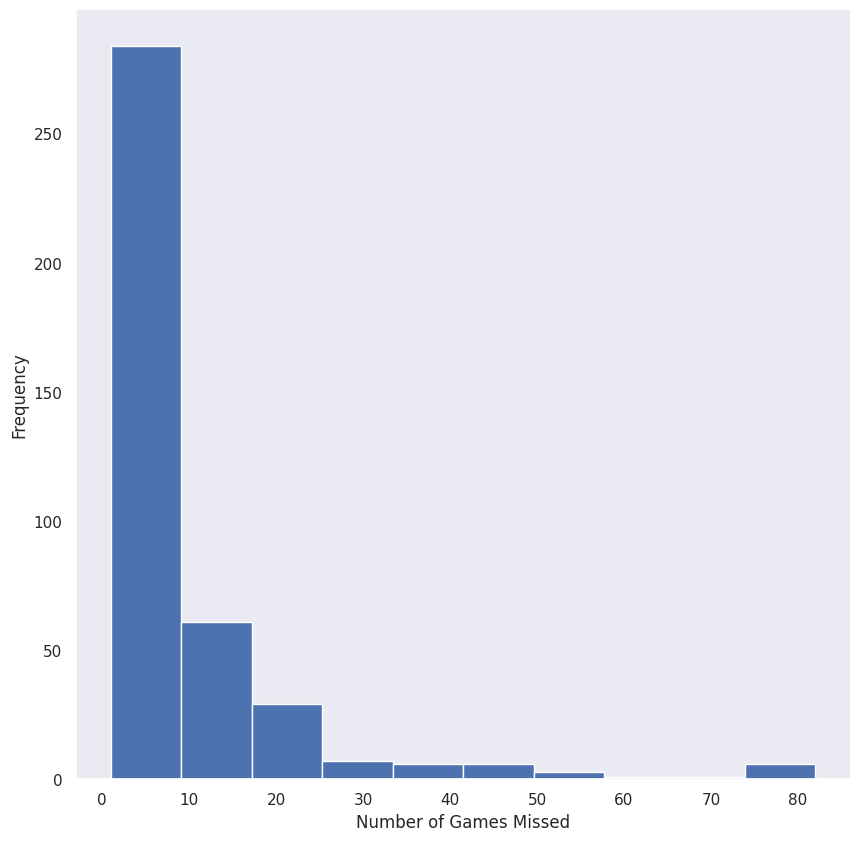

In [ ]:
#2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.figure(figsize=(10,10))
plt.hist(df['Games Missed'], edgecolor='white', label='d')
plt.xlabel("Number of Games Missed")
plt.ylabel("Frequency")
plt.title = ('Frequency of Number of Games Missed ')

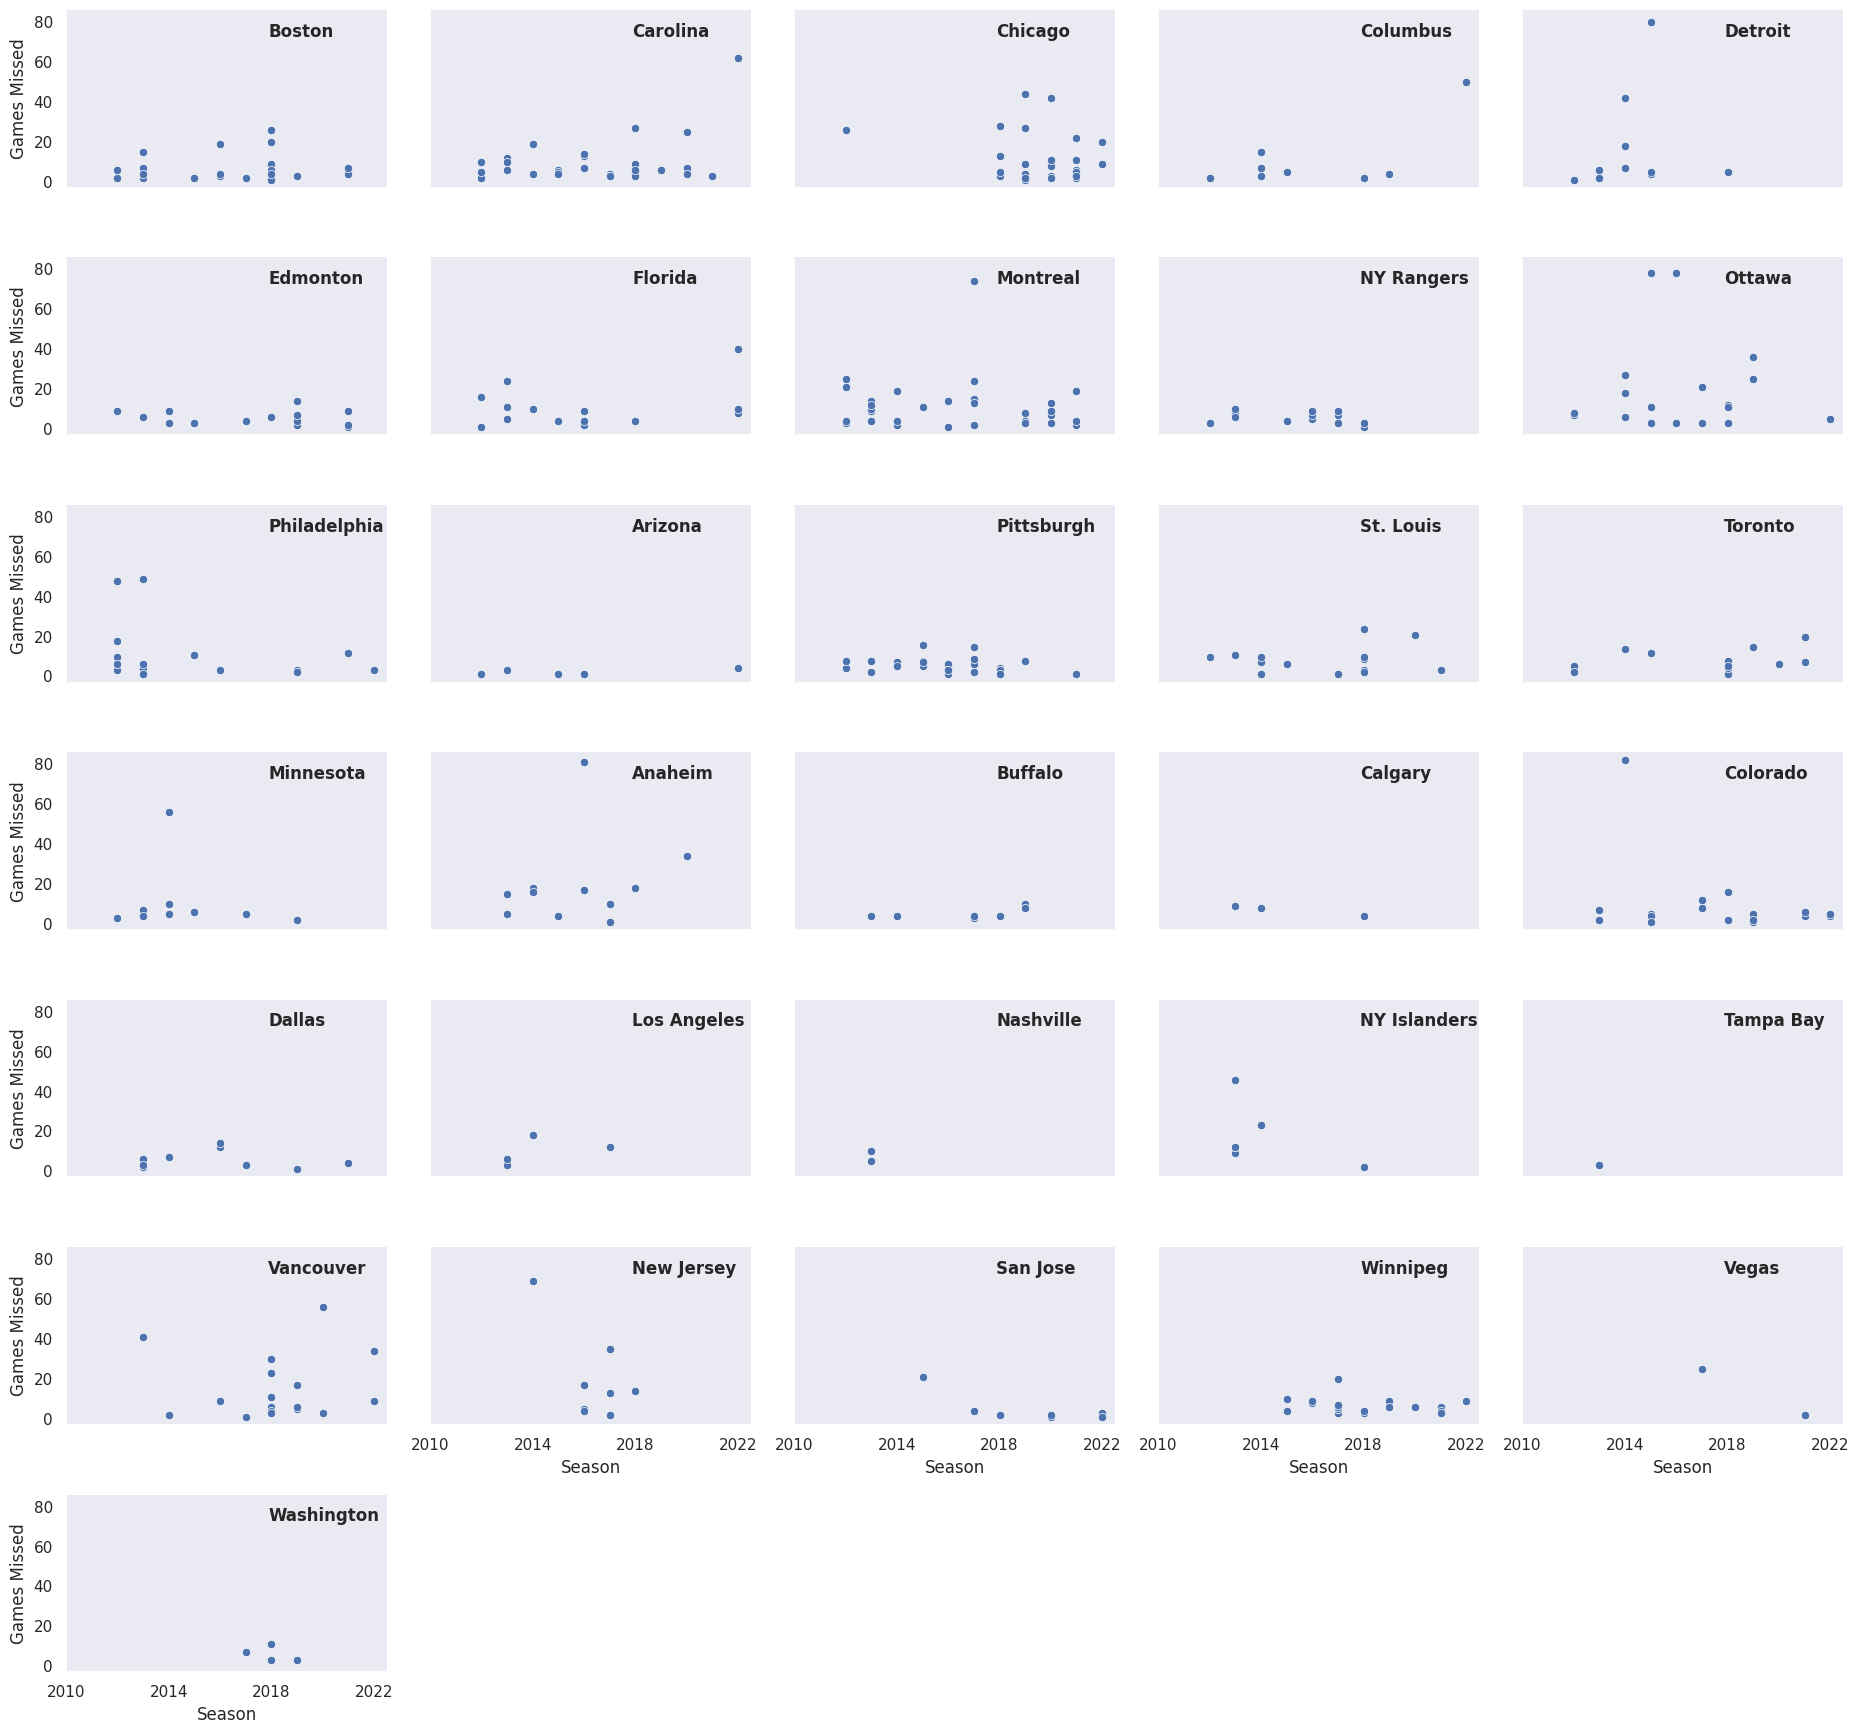

In [ ]:
#3
import seaborn as sns

sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    x="Season", y="Games Missed", col="Team",
    kind="scatter",
    col_wrap=5, height=2.5, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for Team, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.63, .85, Team, transform=ax.transAxes, fontweight="bold")


# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Season", "Games Missed")
g.tight_layout()
